# NYC Service Opportunities #

*by Rosana de Oliveira Gomes*

In this notebook, the Service Opportunities in NYC are investigated through applying NLP and data analysis techniques. 

The data used in this project comes from the website [data.world - NYC Service: Volunteer Opportunities (Historical)
](https://data.world/city-of-ny/bquu-z2ht)

In this analysis, you will learn about:

* keyword extraction 
* data Cleaning and preprocessing with NLP
* assigning categories to text based on a description
* text data visualization 


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## Loading Data ##

Getting data set and pre-defined list of keywords associated to categories


In [2]:
df_raw = pd.read_csv('nyc-service-volunteer-opportunities-historical-1.csv')

print(f"shape of dataframe: {df_raw.shape}")
df_raw.head()

shape of dataframe: (665, 36)


,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,status,Borough,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,5017,37156,5,0,Cents Ability Classroom Set-up,0,Help us set up a new training classroom to tea...,NaN,1.0,Strengthening Communities,...,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5141,38165,5,0,Mentor Homeless Youth,314,Mentor homeless children between the ages of 2...,NaN,3.0,Education,...,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5288,39274,5,0,"Journalism, Copywriting, Creative Writing Oppo...",551,"Are you interested in journalism, research, wr...",NaN,NaN,NaN,...,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5475,41369,10,0,Volunteers Needed for Senior Lunch Program!,54,"In celebration of Father's Day, we invite fath...",y,2.0,Helping Neighbors in Need,...,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5045,37372,40,0,Special Events Assistant,577,The Police Athletic League of New York City se...,NaN,1.0,Strengthening Communities,...,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking dataframe columns:

In [3]:
df_raw.columns

Index(['opportunity_id', 'content_id', 'vol_requests', 'event_time', 'title',
       'hits', 'summary', 'is_priority', 'category_id', 'category_desc',
       'amsl', 'amsl_unit', 'org_title', 'org_content_id', 'addresses_count',
       'locality', 'region', 'Postcode', 'primary_loc', 'display_url',
       'recurrence_type', 'hours', 'created_date', 'last_modified_date',
       'start_date_date', 'end_date_date', 'status', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Community Council ', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

If you are interested in specific keywords for a service opportunity, you can search for specific keywords in the service descriptions. Let's look for something related to art, for example:

In [4]:
with np.printoptions(threshold=np.inf):
    l = ['artistic', 'art', 'painting', 'galery', 'museum', 'sculpture', 'canvas']
    temp = [a for a in df_raw['summary'].to_numpy() \
            if any(word in str(a).split() for word in l)]
    print(np.array(temp))

["Join one of The Laundromat Project's teaching artists Shani Peters and support this community interactive, social practice art project.  It’s easy; put on a sandwich board, grab a stack of flyers, and spread KNOWLEDGE and LOVE throughout Harlem!"
 'Join us for a painting project at MS131 in Chinatown on September 10th 2011. As part of our day of service in remembrance of 9/11.'
 'Become a teaching assistant for the day by helping an LP teaching artist run an outdoor art workshop at a New York City laundromat. Other opportunities available, too!  Most workshops are held at a Harlem laundromat, but we recruit volunteers for events in other locations, as needed.'
 'The Museum Visitor Services volunteer greets visitors to the museum and provides assistance as needed.'
 'The Tank is currently looking for Fall 2011 in the following categories: development, marketing, volunteer coordinator and artistic liaison.'
 'The art of copywriting involves the strategic articulation of words to powerf

## Text Cleaning ##

Steps for typical NLP preprocessing to be applied to the title and summary of service opportunities.

Let's start with importing relevant NLP libraries

In [5]:
import contractions
import string
import nltk
import regex as re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /home/rosana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rosana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rosana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rosana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Next, let's assingn new columns to a copy of the original dataframe, in order to store the preprocessed text of the `title` and `summary` columns.

In [6]:
df_services = df_raw.copy()

**Step 1:** Contraction Mapping / Expanding Contractions

In [7]:
df_services['no_contract_summ'] = df_services['summary'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_services['no_contract_summ'] = [' '.join(map(str, l)) for l in df_services['no_contract_summ']]

df_services['no_contract_title'] = df_services['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_services['no_contract_title'] = [' '.join(map(str, l)) for l in df_services['no_contract_title']]

# Displaying only the extra columns and comparison

df_preprocessed= df_services[['title', 'no_contract_title', 'summary', 'no_contract_summ']]

df_preprocessed

,title,no_contract_title,summary,no_contract_summ
0,Cents Ability Classroom Set-up,Cents Ability Classroom Set-up,Help us set up a new training classroom to tea...,Help us set up a new training classroom to tea...
1,Mentor Homeless Youth,Mentor Homeless Youth,Mentor homeless children between the ages of 2...,Mentor homeless children between the ages of 2...
2,"Journalism, Copywriting, Creative Writing Oppo...","Journalism, Copywriting, Creative Writing Oppo...","Are you interested in journalism, research, wr...","Are you interested in journalism, research, wr..."
3,Volunteers Needed for Senior Lunch Program!,Volunteers Needed for Senior Lunch Program!,"In celebration of Father's Day, we invite fath...","In celebration of Father's Day, we invite fath..."
4,Special Events Assistant,Special Events Assistant,The Police Athletic League of New York City se...,The Police Athletic League of New York City se...
...,...,...,...,...
660,Lifeguard Workshop Facilitators,Lifeguard Workshop Facilitators,Lifeguard facilitators travel the greater NYC ...,Lifeguard facilitators travel the greater NYC ...
661,This Unique Museum Will Be A Big Adventure! --...,This Unique Museum Will Be A Big Adventure! --...,This NYC cultural institution is looking for a...,This NYC cultural institution is looking for a...
662,Transportation Alternatives NYC Century Bike T...,Transportation Alternatives NYC Century Bike T...,Keep the NYC Century Bike Tour rolling by bein...,Keep the NYC Century Bike Tour rolling by bein...
663,Volunteer Archivist Needed,Volunteer Archivist Needed,The Archivist will be responsible for organizi...,The Archivist will be responsible for organizi...


**Step 2:** Tokenization


In [8]:
df_services['tokenized_summ'] = df_services["no_contract_summ"].apply(word_tokenize)
df_services['tokenized_title'] = df_services["no_contract_title"].apply(word_tokenize)

# Displaying only the extra columns and comparison

df_preprocessed= df_services[['title', 'tokenized_title', 'summary', 'tokenized_summ']]

df_preprocessed

,title,tokenized_title,summary,tokenized_summ
0,Cents Ability Classroom Set-up,"[Cents, Ability, Classroom, Set-up]",Help us set up a new training classroom to tea...,"[Help, us, set, up, a, new, training, classroo..."
1,Mentor Homeless Youth,"[Mentor, Homeless, Youth]",Mentor homeless children between the ages of 2...,"[Mentor, homeless, children, between, the, age..."
2,"Journalism, Copywriting, Creative Writing Oppo...","[Journalism, ,, Copywriting, ,, Creative, Writ...","Are you interested in journalism, research, wr...","[Are, you, interested, in, journalism, ,, rese..."
3,Volunteers Needed for Senior Lunch Program!,"[Volunteers, Needed, for, Senior, Lunch, Progr...","In celebration of Father's Day, we invite fath...","[In, celebration, of, Father, 's, Day, ,, we, ..."
4,Special Events Assistant,"[Special, Events, Assistant]",The Police Athletic League of New York City se...,"[The, Police, Athletic, League, of, New, York,..."
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[Lifeguard, Workshop, Facilitators]",Lifeguard facilitators travel the greater NYC ...,"[Lifeguard, facilitators, travel, the, greater..."
661,This Unique Museum Will Be A Big Adventure! --...,"[This, Unique, Museum, Will, Be, A, Big, Adven...",This NYC cultural institution is looking for a...,"[This, NYC, cultural, institution, is, looking..."
662,Transportation Alternatives NYC Century Bike T...,"[Transportation, Alternatives, NYC, Century, B...",Keep the NYC Century Bike Tour rolling by bein...,"[Keep, the, NYC, Century, Bike, Tour, rolling,..."
663,Volunteer Archivist Needed,"[Volunteer, Archivist, Needed]",The Archivist will be responsible for organizi...,"[The, Archivist, will, be, responsible, for, o..."


**Step 3:** Lowercasing

In [9]:
df_services['lower_title'] = df_services['tokenized_title'].apply(lambda x: [word.lower() for word in x])
df_services['lower_summ'] = df_services['tokenized_summ'].apply(lambda x: [word.lower() for word in x])

# Displaying only the extra columns and comparison

df_preprocessed= df_services[['title', 'lower_title', 'summary', 'lower_summ']]

df_preprocessed

,title,lower_title,summary,lower_summ
0,Cents Ability Classroom Set-up,"[cents, ability, classroom, set-up]",Help us set up a new training classroom to tea...,"[help, us, set, up, a, new, training, classroo..."
1,Mentor Homeless Youth,"[mentor, homeless, youth]",Mentor homeless children between the ages of 2...,"[mentor, homeless, children, between, the, age..."
2,"Journalism, Copywriting, Creative Writing Oppo...","[journalism, ,, copywriting, ,, creative, writ...","Are you interested in journalism, research, wr...","[are, you, interested, in, journalism, ,, rese..."
3,Volunteers Needed for Senior Lunch Program!,"[volunteers, needed, for, senior, lunch, progr...","In celebration of Father's Day, we invite fath...","[in, celebration, of, father, 's, day, ,, we, ..."
4,Special Events Assistant,"[special, events, assistant]",The Police Athletic League of New York City se...,"[the, police, athletic, league, of, new, york,..."
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[lifeguard, workshop, facilitators]",Lifeguard facilitators travel the greater NYC ...,"[lifeguard, facilitators, travel, the, greater..."
661,This Unique Museum Will Be A Big Adventure! --...,"[this, unique, museum, will, be, a, big, adven...",This NYC cultural institution is looking for a...,"[this, nyc, cultural, institution, is, looking..."
662,Transportation Alternatives NYC Century Bike T...,"[transportation, alternatives, nyc, century, b...",Keep the NYC Century Bike Tour rolling by bein...,"[keep, the, nyc, century, bike, tour, rolling,..."
663,Volunteer Archivist Needed,"[volunteer, archivist, needed]",The Archivist will be responsible for organizi...,"[the, archivist, will, be, responsible, for, o..."


In [10]:
punc = string.punctuation
df_services['no_punc_title'] = df_services['lower_title'].apply(lambda x: [word for word in x if word not in punc])
df_services['no_punc_summ'] = df_services['lower_summ'].apply(lambda x: [word for word in x if word not in punc])

# Displaying only the extra columns and comparison

df_preprocessed= df_services[['title', 'no_punc_title', 'summary', 'no_punc_summ']]

df_preprocessed

,title,no_punc_title,summary,no_punc_summ
0,Cents Ability Classroom Set-up,"[cents, ability, classroom, set-up]",Help us set up a new training classroom to tea...,"[help, us, set, up, a, new, training, classroo..."
1,Mentor Homeless Youth,"[mentor, homeless, youth]",Mentor homeless children between the ages of 2...,"[mentor, homeless, children, between, the, age..."
2,"Journalism, Copywriting, Creative Writing Oppo...","[journalism, copywriting, creative, writing, o...","Are you interested in journalism, research, wr...","[are, you, interested, in, journalism, researc..."
3,Volunteers Needed for Senior Lunch Program!,"[volunteers, needed, for, senior, lunch, program]","In celebration of Father's Day, we invite fath...","[in, celebration, of, father, 's, day, we, inv..."
4,Special Events Assistant,"[special, events, assistant]",The Police Athletic League of New York City se...,"[the, police, athletic, league, of, new, york,..."
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[lifeguard, workshop, facilitators]",Lifeguard facilitators travel the greater NYC ...,"[lifeguard, facilitators, travel, the, greater..."
661,This Unique Museum Will Be A Big Adventure! --...,"[this, unique, museum, will, be, a, big, adven...",This NYC cultural institution is looking for a...,"[this, nyc, cultural, institution, is, looking..."
662,Transportation Alternatives NYC Century Bike T...,"[transportation, alternatives, nyc, century, b...",Keep the NYC Century Bike Tour rolling by bein...,"[keep, the, nyc, century, bike, tour, rolling,..."
663,Volunteer Archivist Needed,"[volunteer, archivist, needed]",The Archivist will be responsible for organizi...,"[the, archivist, will, be, responsible, for, o..."


**Step 4:** Spell Checking 

In [11]:
spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['cheking', 'the', 'sentence', 'speling'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

print(spell.correction('checking'))
print(spell.correction('cheking'))
print(spell.correction('iuhihiuh'))

checking
{'checking', 'chewing', 'choking'}
spelling
{'spelling', 'spewing'}
checking
checking
iuhihiuh


**Step 5:** Removing ‘Stop Words’ 


In [12]:
stop_words = set(stopwords.words('english'))
df_services['stopwords_rem_title'] = df_services['no_punc_title'].apply(lambda x: [word for word in x if word not in stop_words])
df_services['stopwords_rem_summ'] = df_services['no_punc_title'].apply(lambda x: [word for word in x if word not in stop_words])

# Displaying only the extra columns and comparison

df_preprocessed= df_services[['title', 'stopwords_rem_title', 'summary', 'stopwords_rem_summ']]

df_preprocessed


,title,stopwords_rem_title,summary,stopwords_rem_summ
0,Cents Ability Classroom Set-up,"[cents, ability, classroom, set-up]",Help us set up a new training classroom to tea...,"[cents, ability, classroom, set-up]"
1,Mentor Homeless Youth,"[mentor, homeless, youth]",Mentor homeless children between the ages of 2...,"[mentor, homeless, youth]"
2,"Journalism, Copywriting, Creative Writing Oppo...","[journalism, copywriting, creative, writing, o...","Are you interested in journalism, research, wr...","[journalism, copywriting, creative, writing, o..."
3,Volunteers Needed for Senior Lunch Program!,"[volunteers, needed, senior, lunch, program]","In celebration of Father's Day, we invite fath...","[volunteers, needed, senior, lunch, program]"
4,Special Events Assistant,"[special, events, assistant]",The Police Athletic League of New York City se...,"[special, events, assistant]"
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[lifeguard, workshop, facilitators]",Lifeguard facilitators travel the greater NYC ...,"[lifeguard, workshop, facilitators]"
661,This Unique Museum Will Be A Big Adventure! --...,"[unique, museum, big, adventure, --, 55+]",This NYC cultural institution is looking for a...,"[unique, museum, big, adventure, --, 55+]"
662,Transportation Alternatives NYC Century Bike T...,"[transportation, alternatives, nyc, century, b...",Keep the NYC Century Bike Tour rolling by bein...,"[transportation, alternatives, nyc, century, b..."
663,Volunteer Archivist Needed,"[volunteer, archivist, needed]",The Archivist will be responsible for organizi...,"[volunteer, archivist, needed]"


**Step 6:** Stemming/Lemmatization

In [13]:
df_services['pos_tags_title'] = df_services['stopwords_rem_title'].apply(nltk.tag.pos_tag)
df_services['pos_tags_summ'] = df_services['stopwords_rem_summ'].apply(nltk.tag.pos_tag)

# Displaying only the extra columns and comparison

df_preprocessed= df_services[['title', 'pos_tags_title', 'summary', 'pos_tags_summ']]

df_preprocessed

,title,pos_tags_title,summary,pos_tags_summ
0,Cents Ability Classroom Set-up,"[(cents, NNS), (ability, NN), (classroom, NN),...",Help us set up a new training classroom to tea...,"[(cents, NNS), (ability, NN), (classroom, NN),..."
1,Mentor Homeless Youth,"[(mentor, NN), (homeless, NN), (youth, NN)]",Mentor homeless children between the ages of 2...,"[(mentor, NN), (homeless, NN), (youth, NN)]"
2,"Journalism, Copywriting, Creative Writing Oppo...","[(journalism, NN), (copywriting, VBG), (creati...","Are you interested in journalism, research, wr...","[(journalism, NN), (copywriting, VBG), (creati..."
3,Volunteers Needed for Senior Lunch Program!,"[(volunteers, NNS), (needed, VBD), (senior, JJ...","In celebration of Father's Day, we invite fath...","[(volunteers, NNS), (needed, VBD), (senior, JJ..."
4,Special Events Assistant,"[(special, JJ), (events, NNS), (assistant, NN)]",The Police Athletic League of New York City se...,"[(special, JJ), (events, NNS), (assistant, NN)]"
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[(lifeguard, RB), (workshop, NN), (facilitator...",Lifeguard facilitators travel the greater NYC ...,"[(lifeguard, RB), (workshop, NN), (facilitator..."
661,This Unique Museum Will Be A Big Adventure! --...,"[(unique, JJ), (museum, NN), (big, JJ), (adven...",This NYC cultural institution is looking for a...,"[(unique, JJ), (museum, NN), (big, JJ), (adven..."
662,Transportation Alternatives NYC Century Bike T...,"[(transportation, NN), (alternatives, NNS), (n...",Keep the NYC Century Bike Tour rolling by bein...,"[(transportation, NN), (alternatives, NNS), (n..."
663,Volunteer Archivist Needed,"[(volunteer, NN), (archivist, NN), (needed, VBD)]",The Archivist will be responsible for organizi...,"[(volunteer, NN), (archivist, NN), (needed, VBD)]"


In [14]:
# Translating POS

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
df_services['wordnet_pos_title'] = df_services['pos_tags_title'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_services['wordnet_pos_summ'] = df_services['pos_tags_summ'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# Displaying only the extra columns and comparison

df_preprocessed = df_services[['title', 'wordnet_pos_title', 'summary', 'wordnet_pos_summ']]

df_preprocessed

,title,wordnet_pos_title,summary,wordnet_pos_summ
0,Cents Ability Classroom Set-up,"[(cents, n), (ability, n), (classroom, n), (se...",Help us set up a new training classroom to tea...,"[(cents, n), (ability, n), (classroom, n), (se..."
1,Mentor Homeless Youth,"[(mentor, n), (homeless, n), (youth, n)]",Mentor homeless children between the ages of 2...,"[(mentor, n), (homeless, n), (youth, n)]"
2,"Journalism, Copywriting, Creative Writing Oppo...","[(journalism, n), (copywriting, v), (creative,...","Are you interested in journalism, research, wr...","[(journalism, n), (copywriting, v), (creative,..."
3,Volunteers Needed for Senior Lunch Program!,"[(volunteers, n), (needed, v), (senior, a), (l...","In celebration of Father's Day, we invite fath...","[(volunteers, n), (needed, v), (senior, a), (l..."
4,Special Events Assistant,"[(special, a), (events, n), (assistant, n)]",The Police Athletic League of New York City se...,"[(special, a), (events, n), (assistant, n)]"
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[(lifeguard, r), (workshop, n), (facilitators,...",Lifeguard facilitators travel the greater NYC ...,"[(lifeguard, r), (workshop, n), (facilitators,..."
661,This Unique Museum Will Be A Big Adventure! --...,"[(unique, a), (museum, n), (big, a), (adventur...",This NYC cultural institution is looking for a...,"[(unique, a), (museum, n), (big, a), (adventur..."
662,Transportation Alternatives NYC Century Bike T...,"[(transportation, n), (alternatives, n), (nyc,...",Keep the NYC Century Bike Tour rolling by bein...,"[(transportation, n), (alternatives, n), (nyc,..."
663,Volunteer Archivist Needed,"[(volunteer, n), (archivist, n), (needed, v)]",The Archivist will be responsible for organizi...,"[(volunteer, n), (archivist, n), (needed, v)]"


In [16]:
wnl = WordNetLemmatizer()
df_services['lemmatized_title'] = df_services['wordnet_pos_title'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_services['lemmatized_summ'] = df_services['wordnet_pos_summ'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

# Displaying only the extra columns and comparison

df_preprocessed = df_services[['title', 'lemmatized_title', 'summary', 'lemmatized_summ']]

df_preprocessed

,title,lemmatized_title,summary,lemmatized_summ
0,Cents Ability Classroom Set-up,"[cent, ability, classroom, set-up]",Help us set up a new training classroom to tea...,"[cent, ability, classroom, set-up]"
1,Mentor Homeless Youth,"[mentor, homeless, youth]",Mentor homeless children between the ages of 2...,"[mentor, homeless, youth]"
2,"Journalism, Copywriting, Creative Writing Oppo...","[journalism, copywriting, creative, writing, o...","Are you interested in journalism, research, wr...","[journalism, copywriting, creative, writing, o..."
3,Volunteers Needed for Senior Lunch Program!,"[volunteer, need, senior, lunch, program]","In celebration of Father's Day, we invite fath...","[volunteer, need, senior, lunch, program]"
4,Special Events Assistant,"[special, event, assistant]",The Police Athletic League of New York City se...,"[special, event, assistant]"
...,...,...,...,...
660,Lifeguard Workshop Facilitators,"[lifeguard, workshop, facilitator]",Lifeguard facilitators travel the greater NYC ...,"[lifeguard, workshop, facilitator]"
661,This Unique Museum Will Be A Big Adventure! --...,"[unique, museum, big, adventure, --, 55+]",This NYC cultural institution is looking for a...,"[unique, museum, big, adventure, --, 55+]"
662,Transportation Alternatives NYC Century Bike T...,"[transportation, alternative, nyc, century, bi...",Keep the NYC Century Bike Tour rolling by bein...,"[transportation, alternative, nyc, century, bi..."
663,Volunteer Archivist Needed,"[volunteer, archivist, need]",The Archivist will be responsible for organizi...,"[volunteer, archivist, need]"


We can now put this preprocessing steps together in a function to be applied for any dataframe:

In [17]:
# Preprocessing function

def text_preprocessing(text, spelling=True):
    '''
    NLP preprocessing steps in a given dataframe and returns a preprocessed dataframe
        1. Remove contractions
    2. Tokenization
    3. Lowercasing
    4. Remove punctuation
    5. Remove stopwords
    6. Replace misspelled words
    7. Lemmatization
    
    Arguments:
    `descriptions`: descriptions to be preprocessed
    '''

    # Make sure we have a column of a data frame as input
    text = pd.Index(text)
    
    # 1. Removing contractions
    preprocessed = text.map(lambda x: [contractions.fix(word) for word in x.split()])
    preprocessed = preprocessed.map(lambda x: ' '.join(w for w in x))
    
    # 2. Tokenization
    preprocessed = preprocessed.map(word_tokenize)
    
    # 3. Set all words to lower case
    preprocessed = preprocessed.map(lambda x: [word.lower() for word in x])
    
    # 4. Remove punctuation
    punc = string.punctuation
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in punc])
    
    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in stop_words])
    
    # 6. Replace misspelling
    if spelling:
        spell = SpellChecker()
        preprocessed = preprocessed.map(lambda x: [spell.correction(word) for word in x])
  
    # 7. Lemmatization
    
    preprocessed = preprocessed.map(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    preprocessed = preprocessed.map(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                               for (word, pos_tag) in x])
    
    wnl = WordNetLemmatizer()
    preprocessed = preprocessed.map(lambda x: [wnl.lemmatize(word, tag) 
                                               for word, tag in x])
    
    return preprocessed


In [18]:
# Testing function

test_df = pd.DataFrame()
test_df['summary'] = df_raw['summary']
%time test_df['preprocessed'] = text_preprocessing(test_df['summary'])

CPU times: user 4min 54s, sys: 4.2 s, total: 4min 58s
Wall time: 4min 58s


In [32]:
test_df.head(20)

,summary,preprocessed
0,Help us set up a new training classroom to tea...,"[help, u, set, new, training, classroom, teach..."
1,Mentor homeless children between the ages of 2...,"[mentor, homeless, child, age, 2, 12, weekend,..."
2,"Are you interested in journalism, research, wr...","[interested, journalism, research, write, edit..."
3,"In celebration of Father's Day, we invite fath...","[celebration, father, be, day, invite, father,..."
4,The Police Athletic League of New York City se...,"[police, athletic, league, new, york, city, se..."
5,Helping children 6-12 design a stage for a Dec...,"[help, child, m-19, design, stage, december, 3..."
6,Jewish Home Lifecare is seeking volunteers to ...,"[jewish, home, lifecare, seek, volunteer, assi..."
7,Artists Striving to End Poverty in New York Ci...,"[artist, strive, end, poverty, new, york, city..."
8,Please volunteer for Earth Day events on April...,"[please, volunteer, earth, day, event, april, ..."
9,Share information with NYC's street vendors ab...,"[share, information, nec, be, street, vendor, ..."


## Exploratory Data Analysis (EDA) 

Verifying most common words or combinations of words (ngrams) per category, in order to check if the pre-determined keywords seem valid for the dataset.

In [20]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

Let's review the columns in the dataset:

In [21]:
df_raw['preprocessed'] = test_df['preprocessed']

df_raw.columns

Index(['opportunity_id', 'content_id', 'vol_requests', 'event_time', 'title',
       'hits', 'summary', 'is_priority', 'category_id', 'category_desc',
       'amsl', 'amsl_unit', 'org_title', 'org_content_id', 'addresses_count',
       'locality', 'region', 'Postcode', 'primary_loc', 'display_url',
       'recurrence_type', 'hours', 'created_date', 'last_modified_date',
       'start_date_date', 'end_date_date', 'status', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Community Council ', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'preprocessed'],
      dtype='object')

Now looking into the categories available:

In [22]:
set(df_raw['category_desc'])

{'Education',
 'Emergency Preparedness',
 'Environment',
 'Health',
 'Helping Neighbors in Need',
 'Strengthening Communities',
 nan}

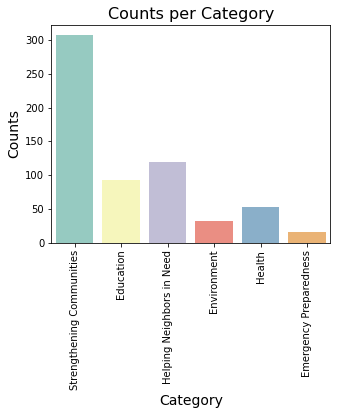

In [23]:
category_count = df_raw['category_desc'].value_counts()

fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(data = df_raw,
               x= 'category_desc',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Counts per Category', fontsize= 16)
ax.set_ylabel('Counts', fontsize=14);
ax.set_xlabel('Category', fontsize=14);

We see that most services are related to `Strengthening Communities` and the minority is related to `Emergency Preparedness`.

Let's now look into the most common words associated to these community services.

In [24]:
#keywords 

def plot_top_keywords_barchart(text, title, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_keywords=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_keywords))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Keywords Frequency")
    plt.ylabel("Top 20 Keywords mentioned in Service Description")
    sns.barplot(x=y,y=x)
    

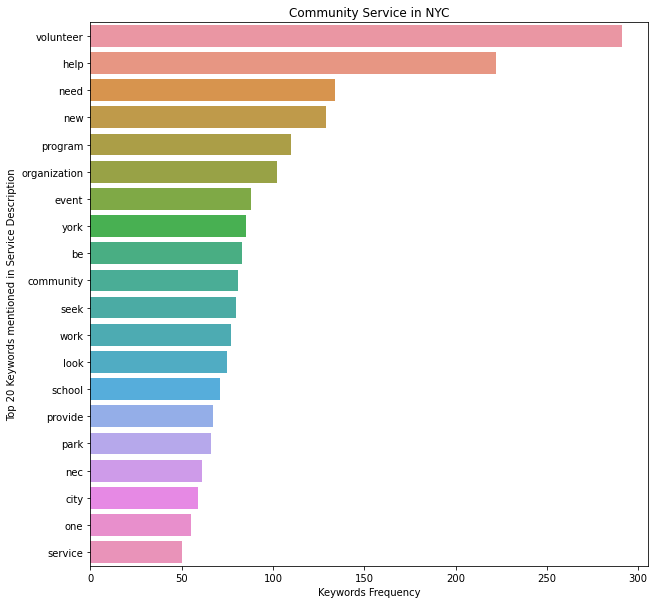

In [25]:
df_raw["preprocessed_text"] = [' '.join(map(str, l)) for l in df_raw['preprocessed']]

plot_top_keywords_barchart(df_raw['preprocessed_text'], 'Community Service in NYC',1)

We can now compare how the keywords diverge across categories:

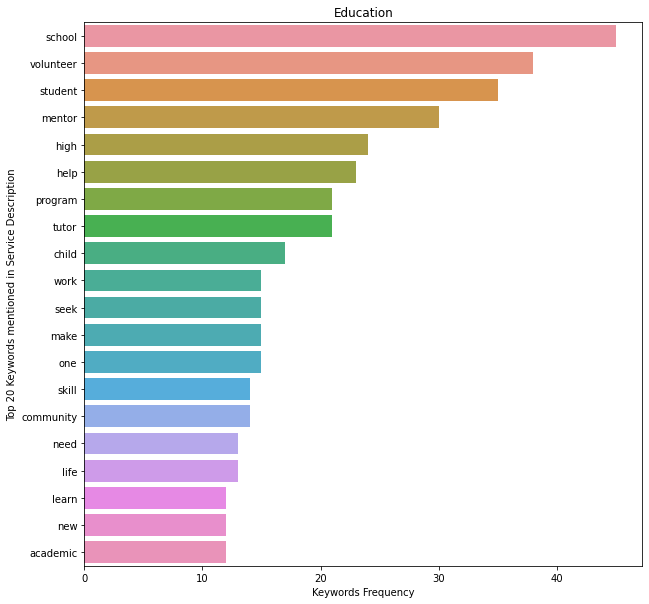

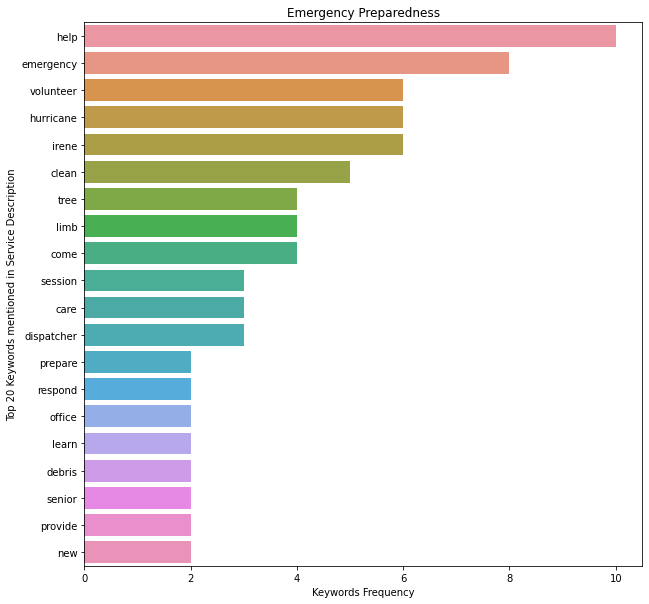

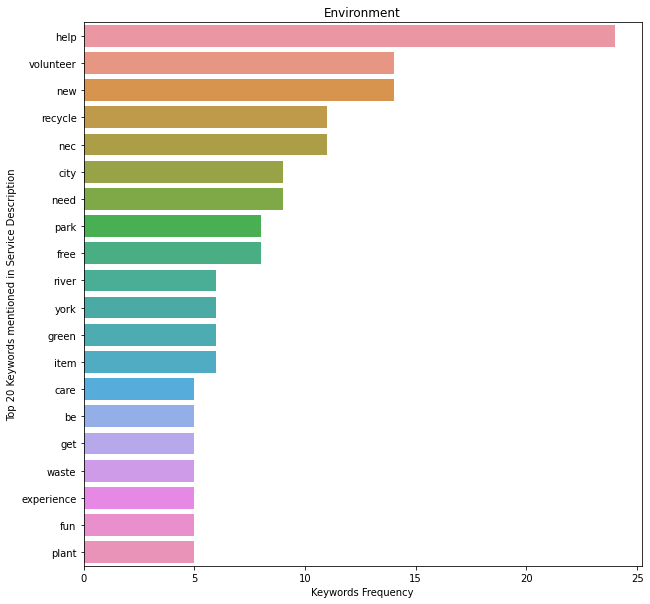

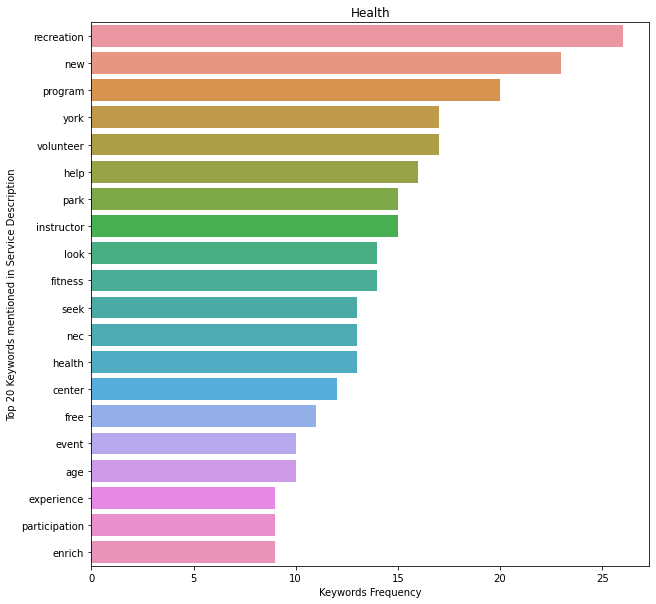

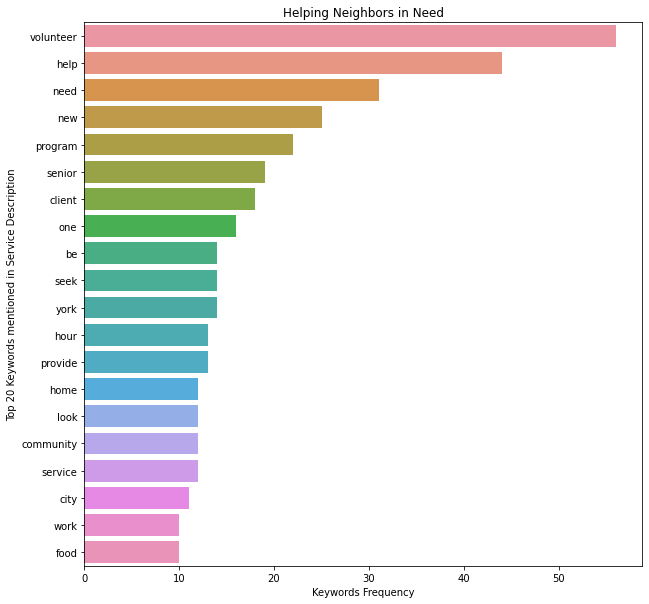

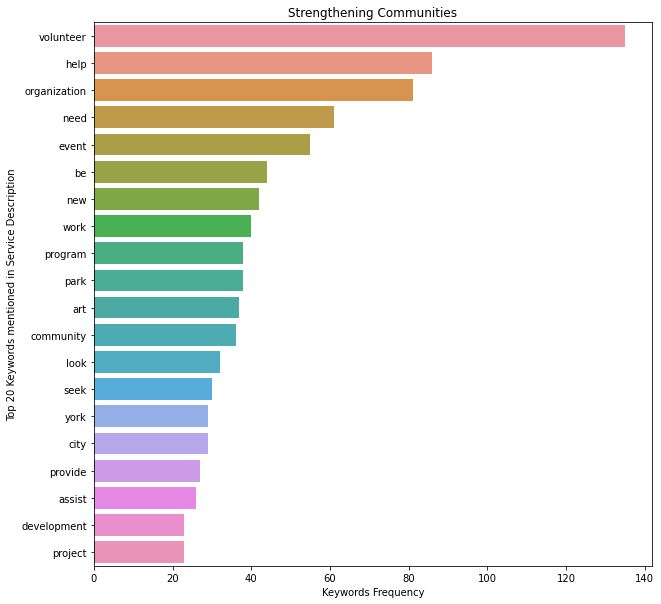

In [26]:
plot_top_keywords_barchart(df_raw[df_raw['category_desc']=='Education']['preprocessed_text'], 'Education', 1)
plot_top_keywords_barchart(df_raw[df_raw['category_desc']=='Emergency Preparedness']['preprocessed_text'], 'Emergency Preparedness', 1)
plot_top_keywords_barchart(df_raw[df_raw['category_desc']=='Environment']['preprocessed_text'], 'Environment', 1)
plot_top_keywords_barchart(df_raw[df_raw['category_desc']=='Health']['preprocessed_text'], 'Health', 1)
plot_top_keywords_barchart(df_raw[df_raw['category_desc']=='Helping Neighbors in Need']['preprocessed_text'], 'Helping Neighbors in Need',1)
plot_top_keywords_barchart(df_raw[df_raw['category_desc']=='Strengthening Communities']['preprocessed_text'], 'Strengthening Communities',1)


We can summarize the most common words per category in wordcloud visualizations:

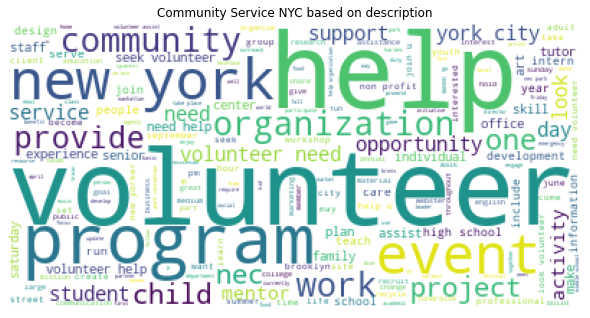

In [27]:
def wordcloud(sentence, title):

    stopword = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=stopword, 
                          contour_width=1).generate(' '.join(sentence))   

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()
    
wordcloud(df_raw['preprocessed_text'], 'Community Service NYC based on description')

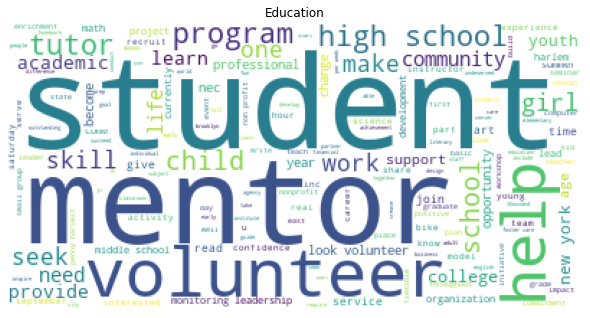

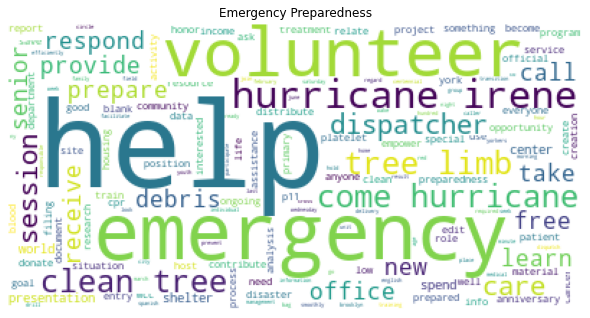

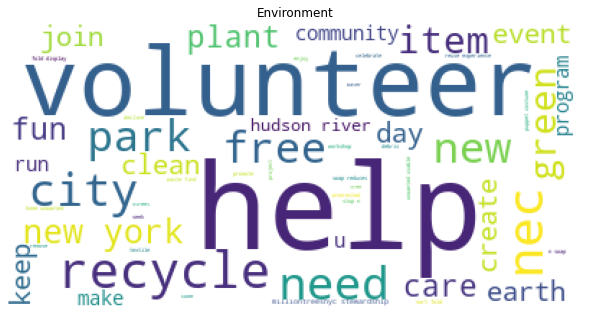

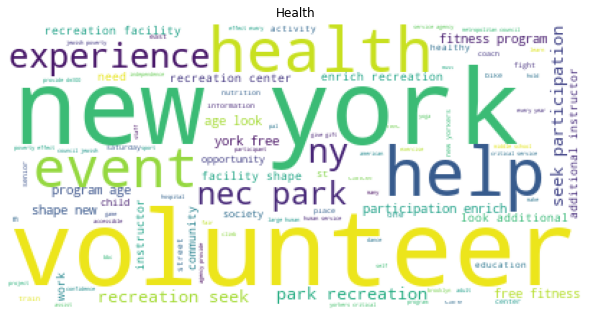

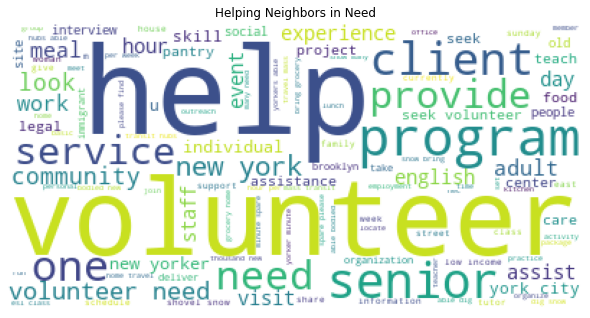

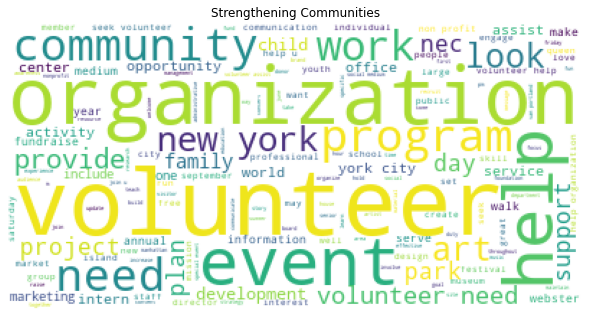

In [28]:
wordcloud(df_raw[df_raw['category_desc']=='Education']['preprocessed_text'], 'Education')


wordcloud(df_raw[df_raw['category_desc']=='Emergency Preparedness']['preprocessed_text'], 'Emergency Preparedness')
wordcloud(df_raw[df_raw['category_desc']=='Environment']['preprocessed_text'], 'Environment')
wordcloud(df_raw[df_raw['category_desc']=='Health']['preprocessed_text'], 'Health')
wordcloud(df_raw[df_raw['category_desc']=='Helping Neighbors in Need']['preprocessed_text'], 'Helping Neighbors in Need')
wordcloud(df_raw[df_raw['category_desc']=='Strengthening Communities']['preprocessed_text'], 'Strengthening Communities')


In [29]:
#Bi-grams 

def plot_top_bigrams_barchart(text, title, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Service Description")
    sns.barplot(x=y,y=x)
    

Checking most common bi-grams for the whole dataset, i.e., most common combinations of 2 words:

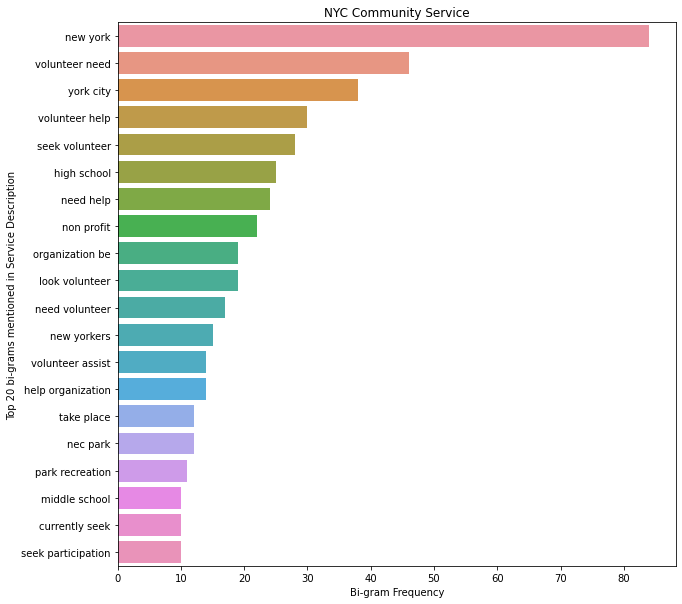

In [30]:
plot_top_bigrams_barchart(df_raw['preprocessed_text'], 'NYC Community Service', 2)


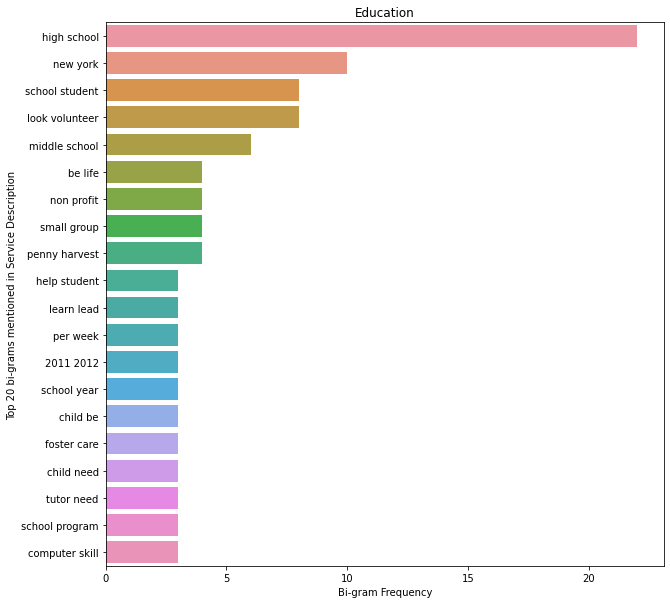

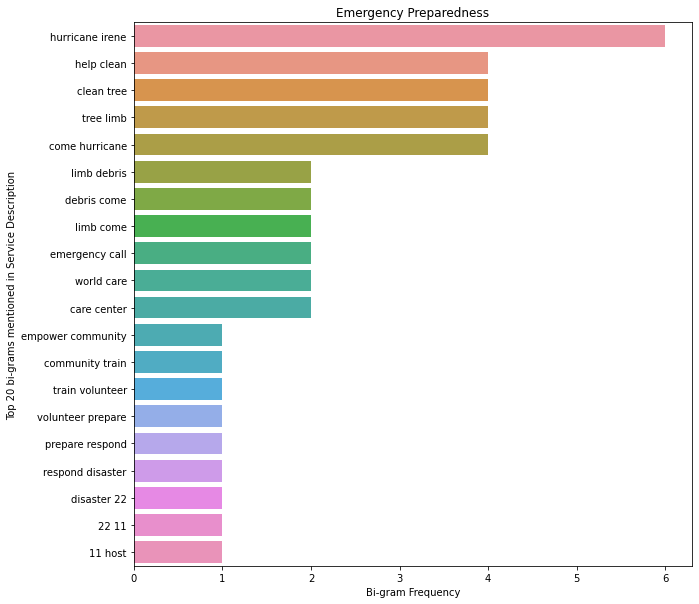

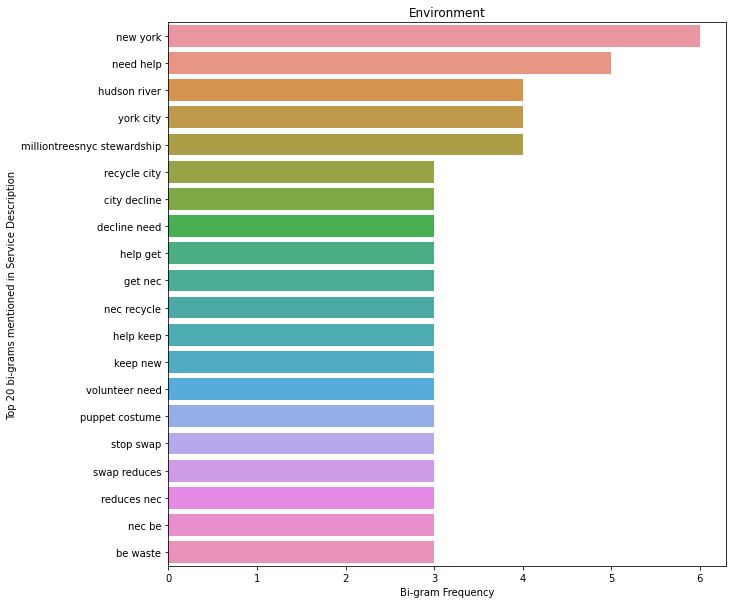

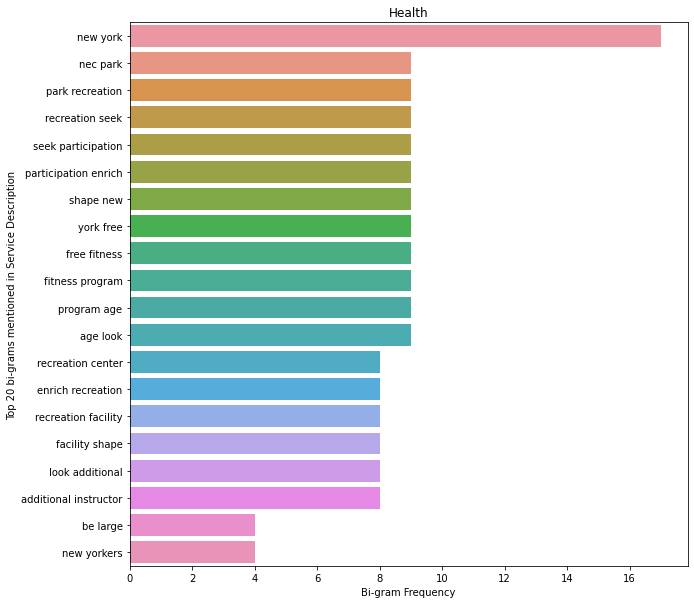

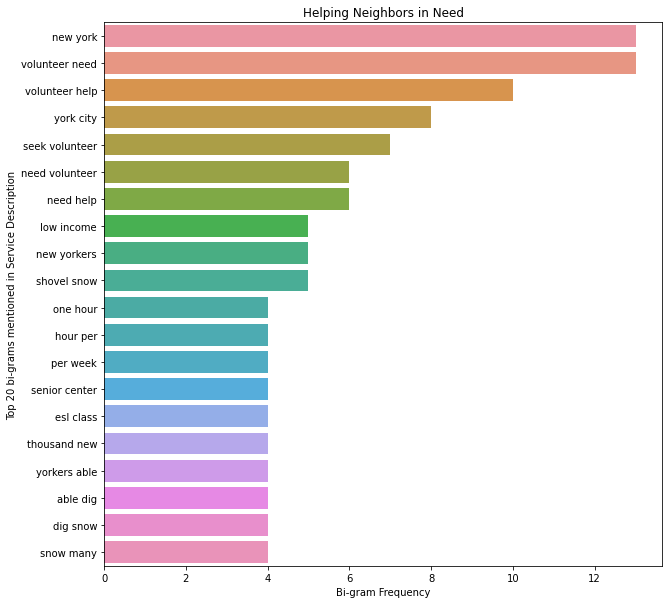

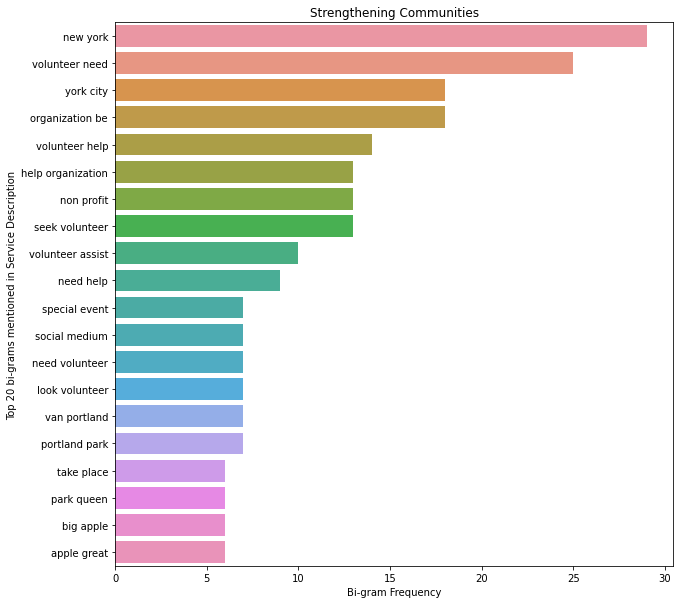

In [33]:
plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Education']['preprocessed_text'], 'Education', 2)
plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Emergency Preparedness']['preprocessed_text'], 'Emergency Preparedness', 2)
plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Environment']['preprocessed_text'], 'Environment', 2)
plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Health']['preprocessed_text'], 'Health', 2)
plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Helping Neighbors in Need']['preprocessed_text'], 'Helping Neighbors in Need',2)
plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Strengthening Communities']['preprocessed_text'], 'Strengthening Communities',2)


In [34]:
#tri-grams

def plot_top_trigrams_barchart(text, title, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in Service Description")
    sns.barplot(x=y,y=x)




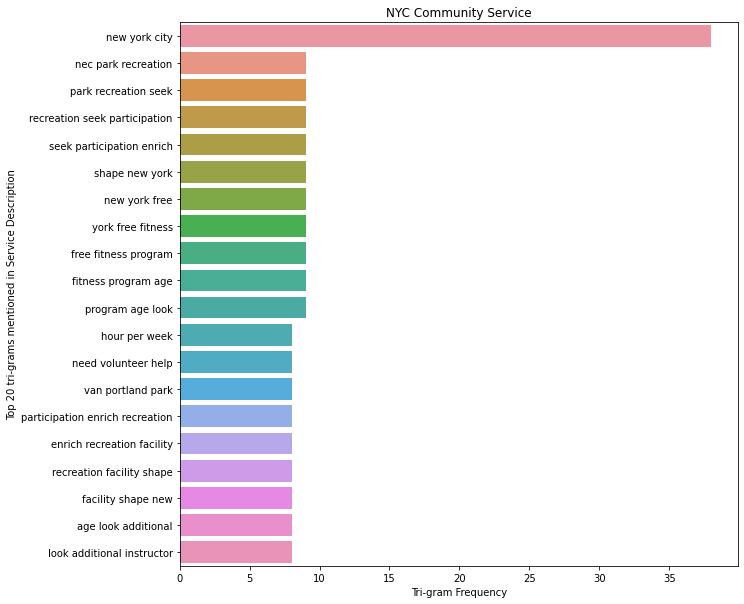

In [35]:
plot_top_trigrams_barchart(df_raw['preprocessed_text'], 'NYC Community Service',3)

Now looking at top tri-grams per category:

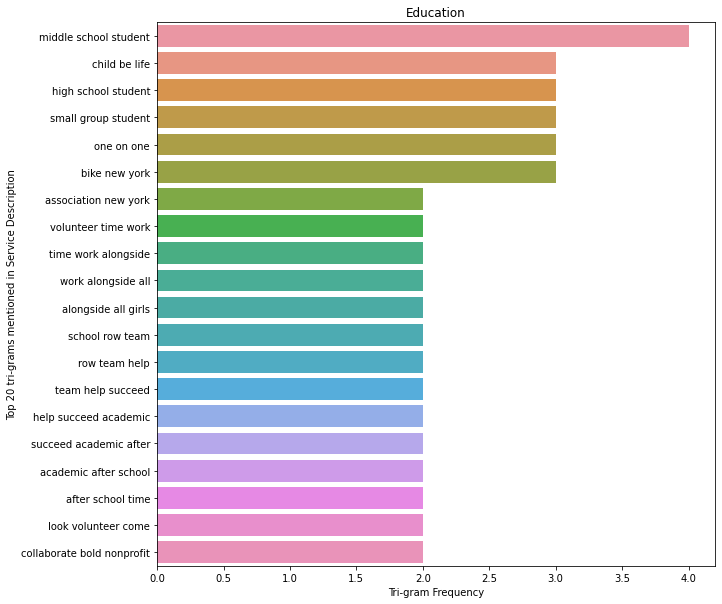

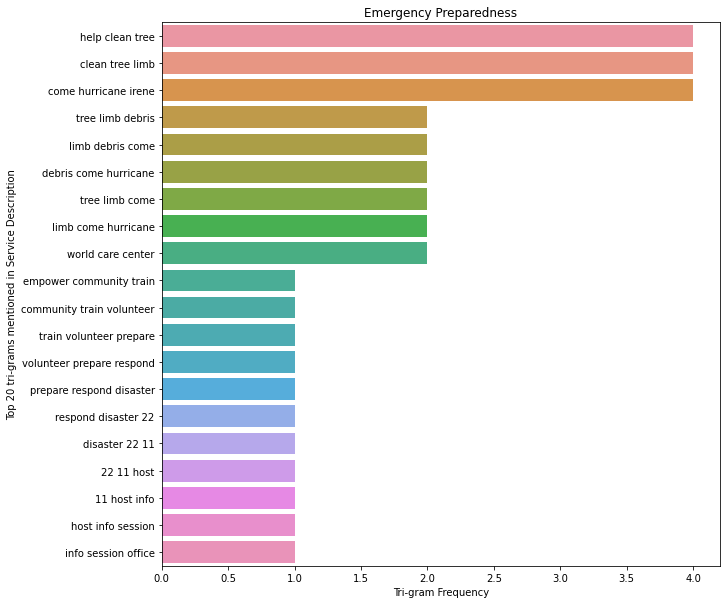

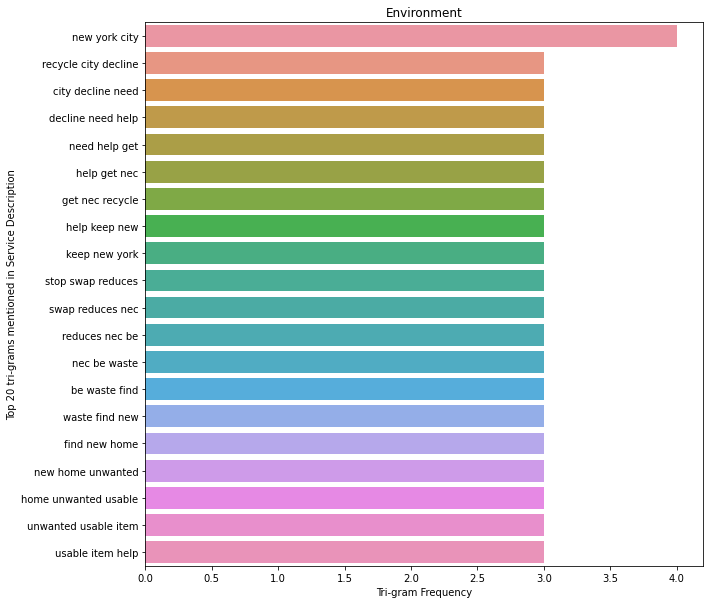

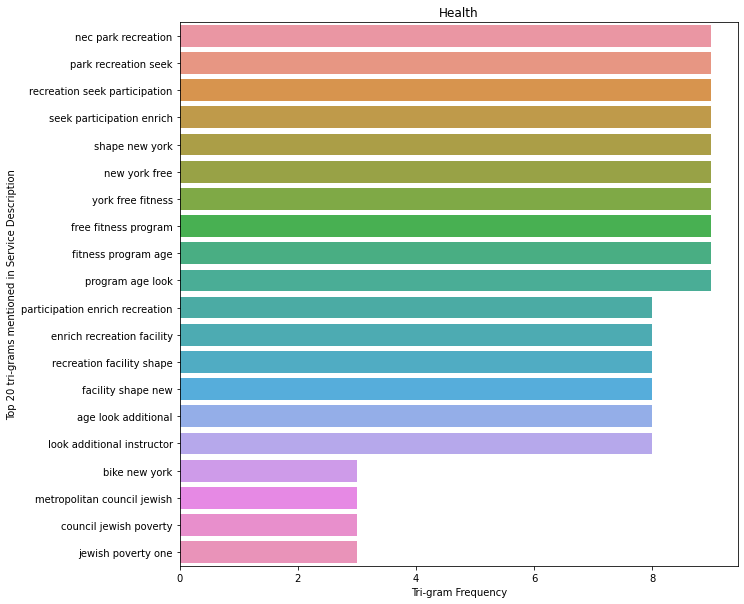

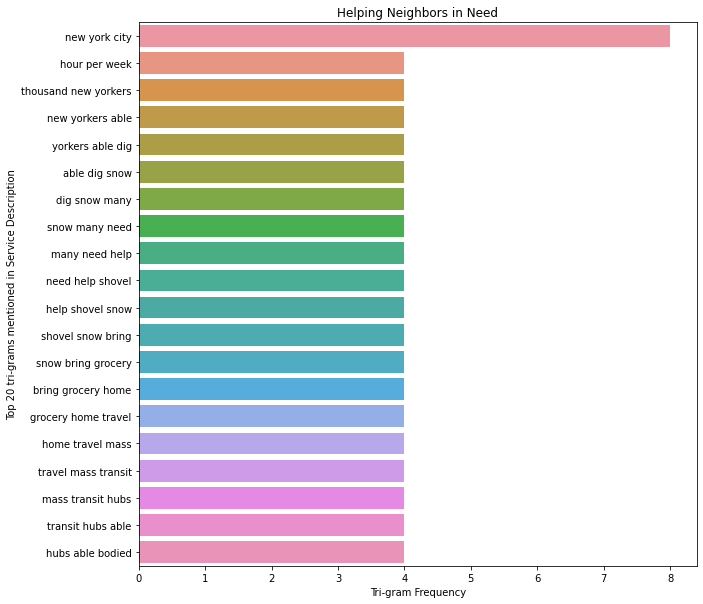

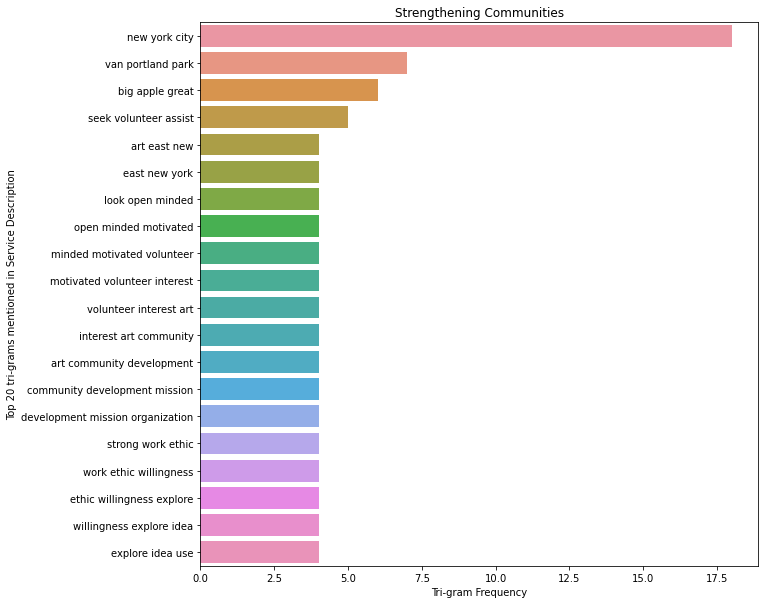

In [36]:
plot_top_trigrams_barchart(df_raw[df_raw['category_desc']=='Education']['preprocessed_text'], 'Education', 3)
plot_top_trigrams_barchart(df_raw[df_raw['category_desc']=='Emergency Preparedness']['preprocessed_text'], 'Emergency Preparedness', 3)
plot_top_trigrams_barchart(df_raw[df_raw['category_desc']=='Environment']['preprocessed_text'], 'Environment', 3)
plot_top_trigrams_barchart(df_raw[df_raw['category_desc']=='Health']['preprocessed_text'], 'Health', 3)
plot_top_trigrams_barchart(df_raw[df_raw['category_desc']=='Helping Neighbors in Need']['preprocessed_text'], 'Helping Neighbors in Need',3)
plot_top_trigrams_barchart(df_raw[df_raw['category_desc']=='Strengthening Communities']['preprocessed_text'], 'Strengthening Communities',3)


One can easily see that the context of each category becomes clearer as more words are added to the ngrams. However, some expressions as `new york city` appear to be dominating across most of categories, indicating that they should be removed in the preprocessing stage. 

Next, we explore whether a new set of categories with pre-defined keywords can be more suitable for this dataset.

## Assigning categories to services

After preprocessing of the services dataframe, we have to now cross check the `summary` of each service opportunity to a list of pre-defined categories. For doing so, we first need to load and preprocessed the keywords in the categories as well. 

**Step 1:** Loading Pre-defined Categories


In [37]:
categories = pd.read_excel('categories.xlsx', dtype=str).to_dict('list')

for key, value in categories.items():
    value = set(value)
    value.discard(np.nan)
    categories[key] = value

# Example    
categories.keys()

dict_keys(['Crafts & Household', 'Culture', 'Travel', 'Education', 'Services', 'Recreation', 'Child Care', 'Home Care', 'Donation', 'Fundraising', 'IT Support', 'Health & Wellness', 'Counseling', 'Sports & Outdoors', 'Sustainability & Gardening', 'Religion'])

In [38]:
# Perform same preprocessing as for descriptions
for key, value in categories.items():
    words = set()
    for l in text_preprocessing(value, spelling=True):
        for x in l:
            words.add(x)
    categories[key] = words

categories['Travel']

{'accommodation',
 'airline',
 'airport',
 'apartment',
 'backpacking',
 'bungalow',
 'camp',
 'city',
 'co-housing',
 'commutation',
 'commute',
 'cottage',
 'couch',
 'cruise',
 'dormitory',
 'exchange',
 'family',
 'ferry',
 'fly',
 'globetrotter',
 'go',
 'guest',
 'guesthouse',
 'guide',
 'hike',
 'holiday',
 'honeymoon',
 'hostel',
 'hotel',
 'inn',
 'internship',
 'journey',
 'lodge',
 'luggage',
 'main',
 'maisonette',
 'motel',
 'move',
 'pilgrimage',
 'residence',
 'ride',
 'roommate',
 'route',
 'seafaring',
 'sleep',
 'station',
 'student',
 'suite',
 'surfing',
 'ticket',
 'tour',
 'tourism',
 'tourist',
 'train',
 'transit',
 'trip',
 'vacation',
 'visit',
 'voyage',
 'walk'}

In [39]:
# Checking number of categories

print(len(categories.keys()), list(categories.keys()))


16 ['Crafts & Household', 'Culture', 'Travel', 'Education', 'Services', 'Recreation', 'Child Care', 'Home Care', 'Donation', 'Fundraising', 'IT Support', 'Health & Wellness', 'Counseling', 'Sports & Outdoors', 'Sustainability & Gardening', 'Religion']


Set the format of dataset to assing a category per row, given a summary:

In [40]:
for category in categories.keys():
    df_raw[category] = np.zeros(len(df_raw))

df_raw.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   opportunity_id              665 non-null    int64  
 1   content_id                  665 non-null    int64  
 2   vol_requests                665 non-null    int64  
 3   event_time                  665 non-null    int64  
 4   title                       665 non-null    object 
 5   hits                        665 non-null    int64  
 6   summary                     665 non-null    object 
 7   is_priority                 62 non-null     object 
 8   category_id                 617 non-null    float64
 9   category_desc               617 non-null    object 
 10  amsl                        0 non-null      float64
 11  amsl_unit                   0 non-null      float64
 12  org_title                   665 non-null    object 
 13  org_content_id              665 non

In [41]:
df_raw.head(10)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,Child Care,Home Care,Donation,Fundraising,IT Support,Health & Wellness,Counseling,Sports & Outdoors,Sustainability & Gardening,Religion
0,5017,37156,5,0,Cents Ability Classroom Set-up,0,Help us set up a new training classroom to tea...,NaN,1.0,Strengthening Communities,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5141,38165,5,0,Mentor Homeless Youth,314,Mentor homeless children between the ages of 2...,NaN,3.0,Education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5288,39274,5,0,"Journalism, Copywriting, Creative Writing Oppo...",551,"Are you interested in journalism, research, wr...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5475,41369,10,0,Volunteers Needed for Senior Lunch Program!,54,"In celebration of Father's Day, we invite fath...",y,2.0,Helping Neighbors in Need,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5045,37372,40,0,Special Events Assistant,577,The Police Athletic League of New York City se...,NaN,1.0,Strengthening Communities,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5685,51382,2,0,Stage Design,121,Helping children 6-12 design a stage for a Dec...,NaN,1.0,Strengthening Communities,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5744,52471,5,0,Special Events Assistant,65,Jewish Home Lifecare is seeking volunteers to ...,NaN,2.0,Helping Neighbors in Need,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5014,37132,30,0,Artist Volunteer Opportunities,672,Artists Striving to End Poverty in New York Ci...,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5253,39071,50,0,Volunteer for Earth Day Events,1396,Please volunteer for Earth Day events on April...,y,4.0,Environment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5094,37742,20,0,Street Vendor Project - Join Our Monthly Outre...,274,Share information with NYC's street vendors ab...,NaN,1.0,Strengthening Communities,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Step 2:** Build a dictionary of the keywords of categories

In [42]:
dict_keywords = {}

for category in categories.keys():
    for keyword in categories[category]:
        if keyword not in dict_keywords.keys():
            dict_keywords[keyword] = [category]
        else:            
            dict_keywords[keyword].append(category)

In [43]:
# Displaying example of last keys in dictionary

print({k: dict_keywords[k] for k in list(dict_keywords)[-10:-1]})

{'religious': ['Religion'], 'deepawali': ['Religion'], 'day': ['Religion'], 'ordination': ['Religion'], 'christian': ['Religion'], 'buddhist': ['Religion'], 'solstice': ['Religion'], 'ramadan': ['Religion'], 'clergyman': ['Religion']}


In [44]:
# Number of words in dictionary

len(dict_keywords.keys())

1136

In [45]:
# Check if there are still NaN values

np.nan in dict_keywords

False

**Step 3:** Matching words in summary with dictionary

In [46]:
# Scan each word in preprocessed description 

for index, row in df_raw.iterrows():
    for keyword in row['preprocessed']:

        # Check if word appears in dictionary
        if keyword in dict_keywords:
            #print('found keyword:', keyword)

            # Scan categories associated to keyword
            for category in dict_keywords[keyword]:
                # Add one to the counter of category in the description
                df_raw.at[index, category] += 1
                #print('inrease count to', descr_df.at[index, category])

In [47]:
df_raw.head(10)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,Child Care,Home Care,Donation,Fundraising,IT Support,Health & Wellness,Counseling,Sports & Outdoors,Sustainability & Gardening,Religion
0,5017,37156,5,0,Cents Ability Classroom Set-up,0,Help us set up a new training classroom to tea...,NaN,1.0,Strengthening Communities,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,5141,38165,5,0,Mentor Homeless Youth,314,Mentor homeless children between the ages of 2...,NaN,3.0,Education,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5288,39274,5,0,"Journalism, Copywriting, Creative Writing Oppo...",551,"Are you interested in journalism, research, wr...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5475,41369,10,0,Volunteers Needed for Senior Lunch Program!,54,"In celebration of Father's Day, we invite fath...",y,2.0,Helping Neighbors in Need,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,5045,37372,40,0,Special Events Assistant,577,The Police Athletic League of New York City se...,NaN,1.0,Strengthening Communities,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5685,51382,2,0,Stage Design,121,Helping children 6-12 design a stage for a Dec...,NaN,1.0,Strengthening Communities,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,5744,52471,5,0,Special Events Assistant,65,Jewish Home Lifecare is seeking volunteers to ...,NaN,2.0,Helping Neighbors in Need,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,5014,37132,30,0,Artist Volunteer Opportunities,672,Artists Striving to End Poverty in New York Ci...,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5253,39071,50,0,Volunteer for Earth Day Events,1396,Please volunteer for Earth Day events on April...,y,4.0,Environment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,5094,37742,20,0,Street Vendor Project - Join Our Monthly Outre...,274,Share information with NYC's street vendors ab...,NaN,1.0,Strengthening Communities,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


**Step 4:** Post processing for categories encoding

Setting all values of categories to `1` (belong) or `0` (don't belong):

In [48]:
# Remove description from list if it does not find a category
descr_train = df_raw[df_raw[categories.keys()].sum(axis=1) != 0.]

# Read top categories
for index, row in descr_train.iterrows():
    higher = row[categories.keys()].sort_values(ascending=False)
    nonzero = higher.index[higher.values > 0]
    
    # Reset categories to 0
    descr_train.loc[index, categories.keys()] = 0.

    # Set categories to 1
    descr_train.loc[index, nonzero] = 1.
    
descr_train.head()

/home/rosana/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,Child Care,Home Care,Donation,Fundraising,IT Support,Health & Wellness,Counseling,Sports & Outdoors,Sustainability & Gardening,Religion
0,5017,37156,5,0,Cents Ability Classroom Set-up,0,Help us set up a new training classroom to tea...,NaN,1.0,Strengthening Communities,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,5141,38165,5,0,Mentor Homeless Youth,314,Mentor homeless children between the ages of 2...,NaN,3.0,Education,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5288,39274,5,0,"Journalism, Copywriting, Creative Writing Oppo...",551,"Are you interested in journalism, research, wr...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5475,41369,10,0,Volunteers Needed for Senior Lunch Program!,54,"In celebration of Father's Day, we invite fath...",y,2.0,Helping Neighbors in Need,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5045,37372,40,0,Special Events Assistant,577,The Police Athletic League of New York City se...,NaN,1.0,Strengthening Communities,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


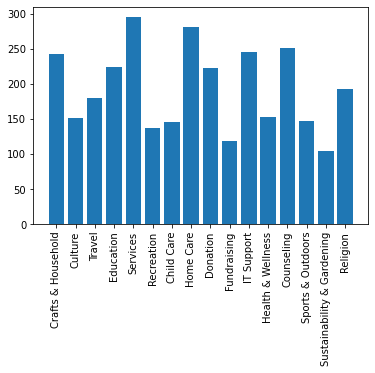

In [49]:
import matplotlib.pyplot as plt

category_count = descr_train[categories.keys()].sum()

fig, ax = plt.subplots()
plt.bar(category_count.index, category_count)
plt.xticks(rotation=90)

plt.show()

We can now compare 2 of the previous and new categories and see how their keywords diverge. First let's look into `Education` according to the new pre-defined category:

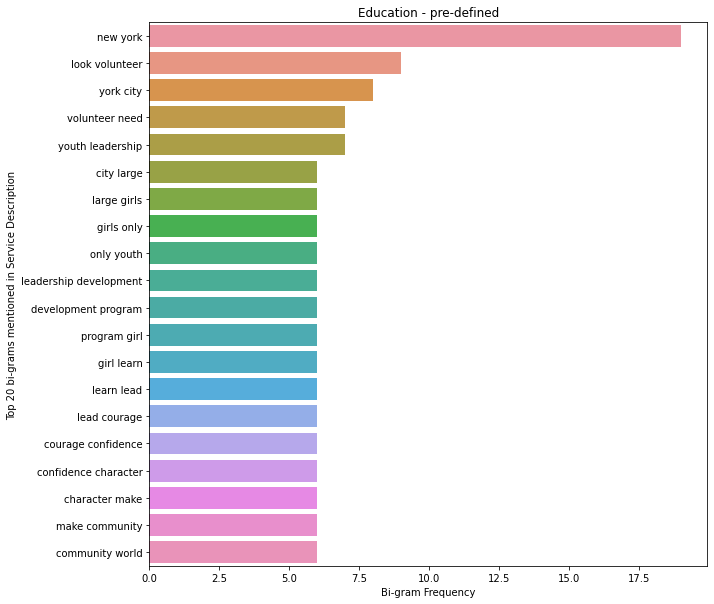

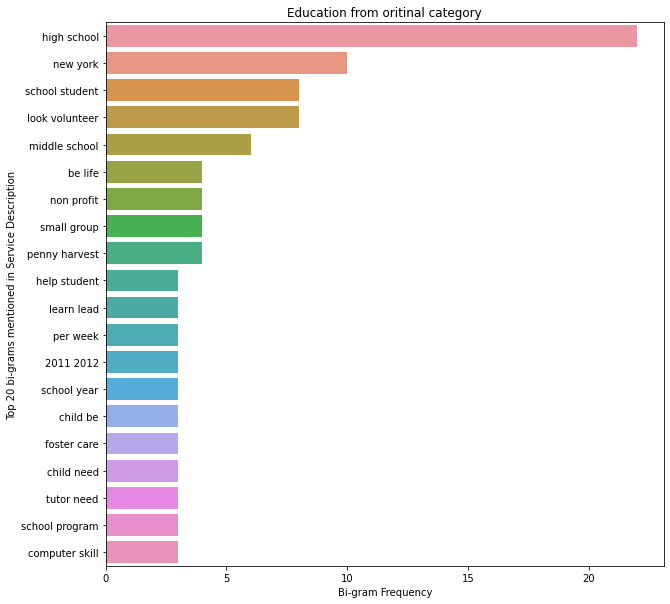

In [52]:
plot_top_bigrams_barchart(df_raw[df_raw['Education']==1]['preprocessed_text'], 'Education from pre-defined keywords', 2)

plot_top_bigrams_barchart(df_raw[df_raw['category_desc']=='Education']['preprocessed_text'], 'Education from original category',2)


and for the former one:

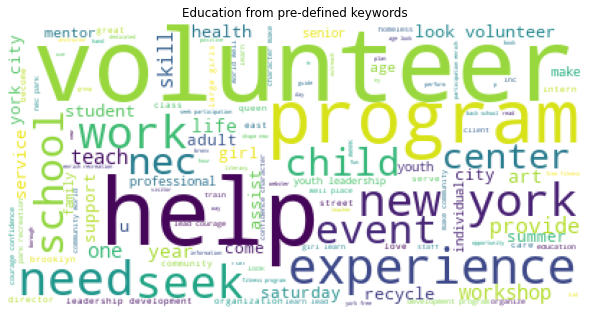

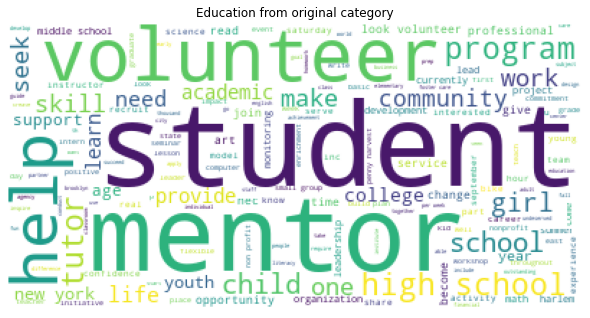

In [54]:
wordcloud(df_raw[df_raw['Education']==1]['preprocessed_text'], 'Education from pre-defined keywords')

wordcloud(df_raw[df_raw['category_desc']=='Education']['preprocessed_text'], 'Education from original category')


We can see that although the 2 categories represent `Education` for the same dataset, they differ significantly in terms of the key bi-grams representation, except by expressions such as `new york`. 

This simple exercise shows that the way keywords are defined in a categorization process (very common for building classifiers) can play an important role on the outcomes of your analysis. Further improvements of this analysis are presented below.

## Further improvements ##

* Add regular expression imposition in preprocessing   
Example: 
`title_df['title'] = title_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))`

* Further explore new categories

* Apply method for title

* Build a classifier for categories